In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering,MeanShift, estimate_bandwidth, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
data = pd.read_csv("/content/sample_data/customer_segmentation.csv")

In [5]:
data.head(6)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
data.dropna(subset="Income", inplace=True)

In [9]:
data['Year_Birth'].describe()

,Year_Birth
count,2216.000000
mean,1968.820397
std,11.985554
min,1893.000000
25%,1959.000000
50%,1970.000000
75%,1977.000000
max,1996.000000


<ipython-input-10-416d96d66767>:2: UserWarning: 
The palette list has fewer values (6) than needed (59) and will cycle, which may produce an uninterpretable plot.
  graph = sns.countplot(data=data , x='Year_Birth', hue='Year_Birth', palette=sns.color_palette("ch:start=.2,rot=-.3"), legend=False)


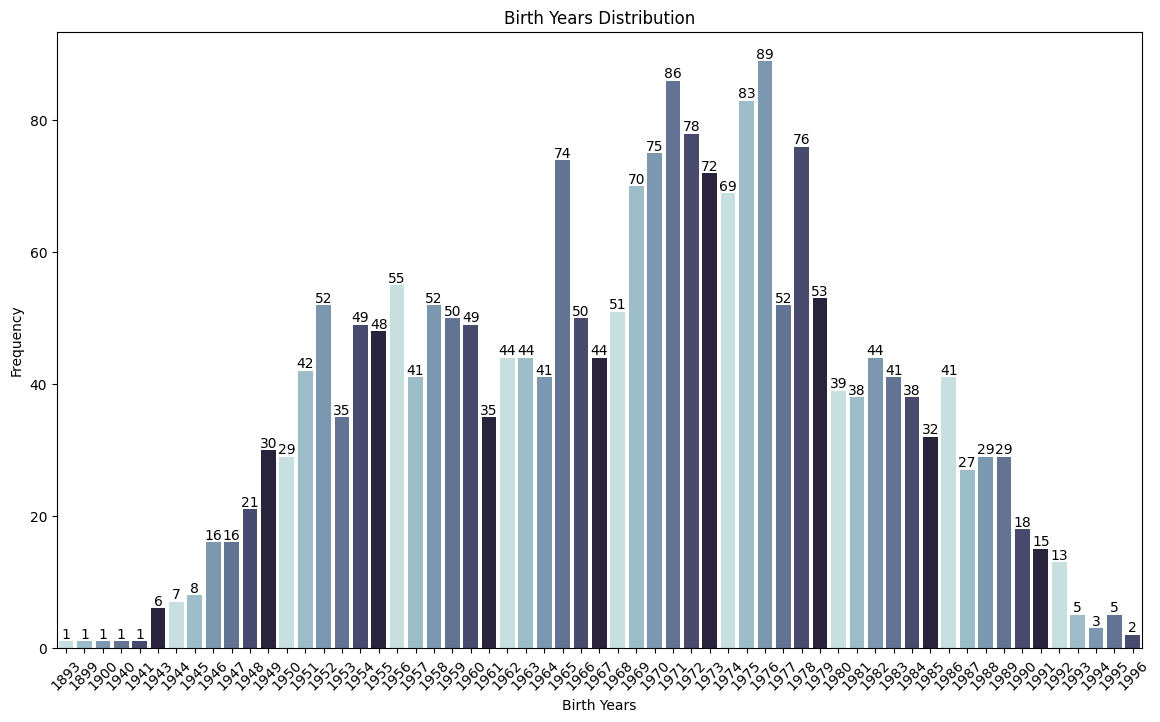

In [10]:
plt.figure(figsize=[14,8])
graph = sns.countplot(data=data , x='Year_Birth', hue='Year_Birth', palette=sns.color_palette("ch:start=.2,rot=-.3"), legend=False)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Birth Years Distribution')
plt.xlabel('Birth Years')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

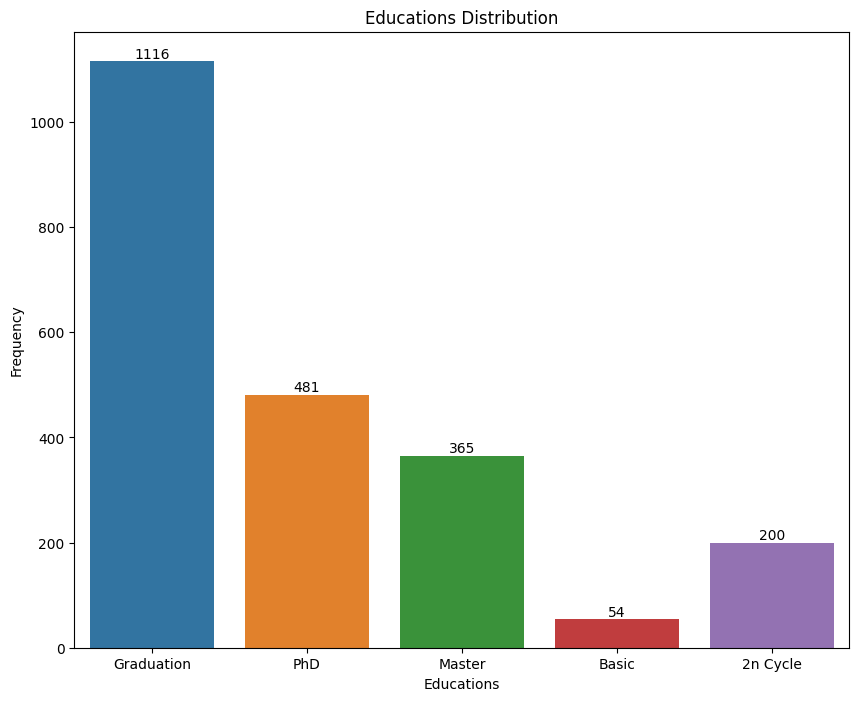

In [12]:
plt.figure(figsize=[10,8])
graph = sns.countplot(data=data, x='Education', hue='Education', legend=False)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Educations Distribution')
plt.xlabel('Educations')
plt.ylabel('Frequency')
plt.show()

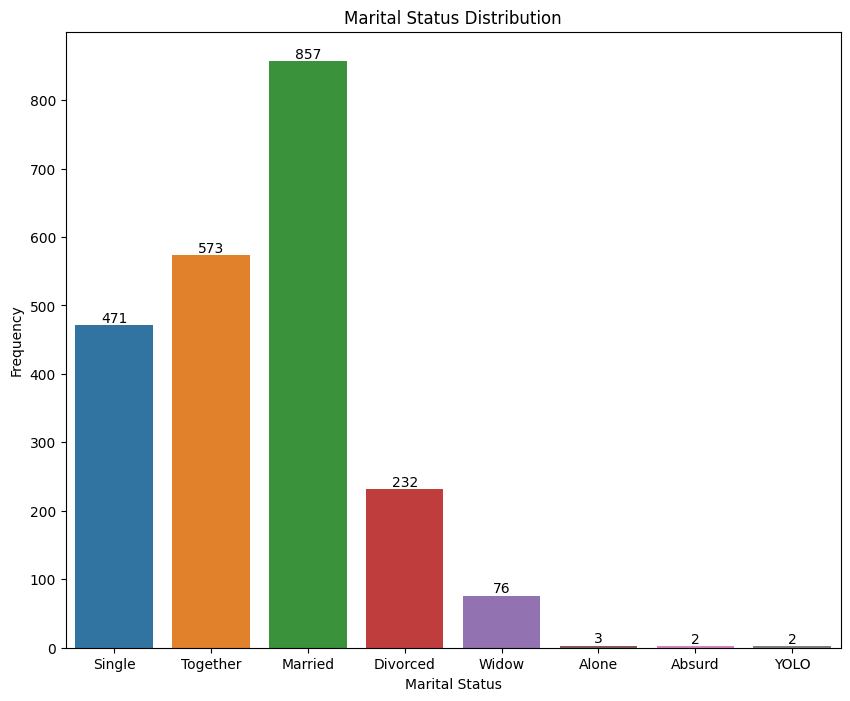

In [13]:
plt.figure(figsize=[10,8])
graph = sns.countplot(data=data , x='Marital_Status', hue='Marital_Status', legend=False)
for container in graph.containers:
    graph.bar_label(container)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

In [14]:
data.Income.describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


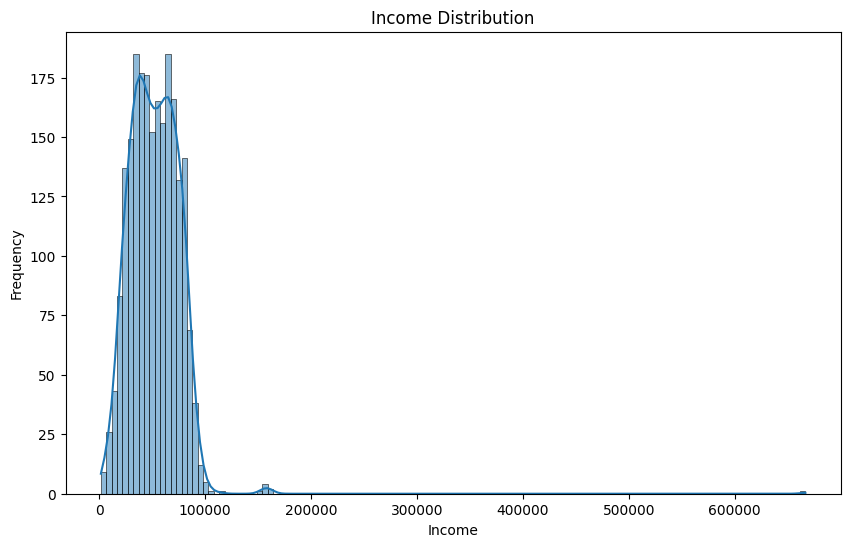

In [15]:
plt.figure(figsize=[10,6])
sns.histplot(data=data, x='Income', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [18]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data['Income'] = np.where(data['Income'] < lower_bound, lower_bound, np.where(data['Income'] > upper_bound, upper_bound, data['Income']))

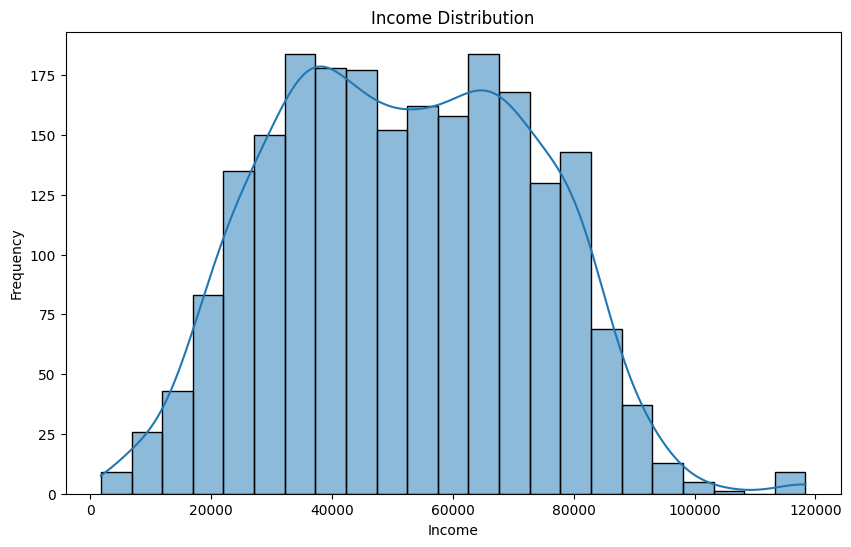

In [19]:
plt.figure(figsize=[10,6])
sns.histplot(data=data, x='Income', kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

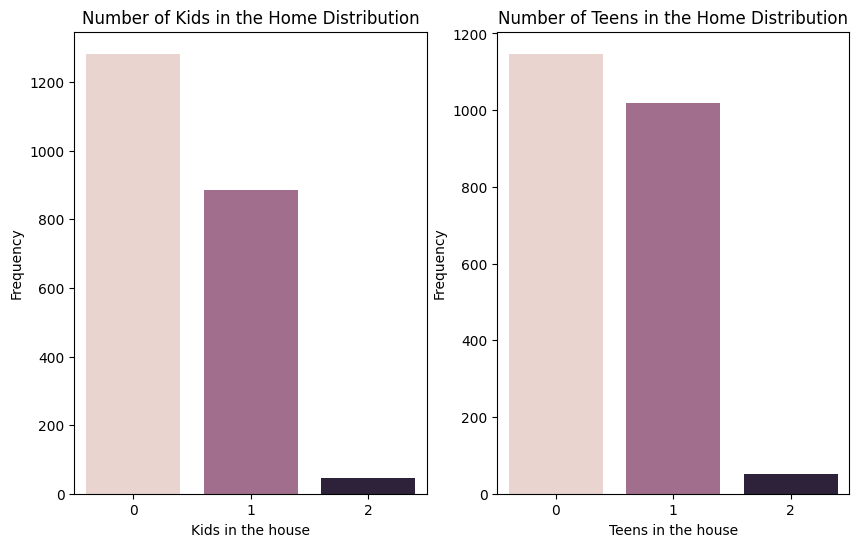

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.countplot(data, x='Kidhome', hue='Kidhome', legend=False)
plt.title('Number of Kids in the Home Distribution')
plt.xlabel('Kids in the house')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.countplot(data, x='Teenhome',hue='Teenhome', legend=False)
plt.title('Number of Teens in the Home Distribution')
plt.xlabel('Teens in the house')
plt.ylabel('Frequency')
plt.show()

In [21]:
data.Recency.describe()

,Recency
count,2216.000000
mean,49.012635
std,28.948352
min,0.000000
25%,24.000000
50%,49.000000
75%,74.000000
max,99.000000


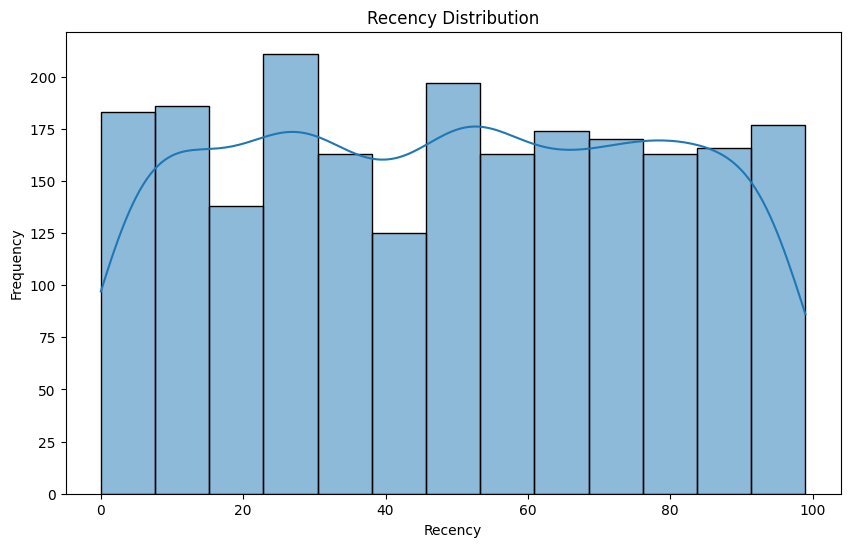

In [22]:
plt.figure(figsize=[10,6])
sns.histplot(data=data, x='Recency', kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

In [23]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'] + data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

In [24]:
data['Expenses'].describe()

,Expenses
count,2216.000000
mean,621.956227
std,608.723493
min,5.000000
25%,76.000000
50%,412.000000
75%,1071.000000
max,2553.000000


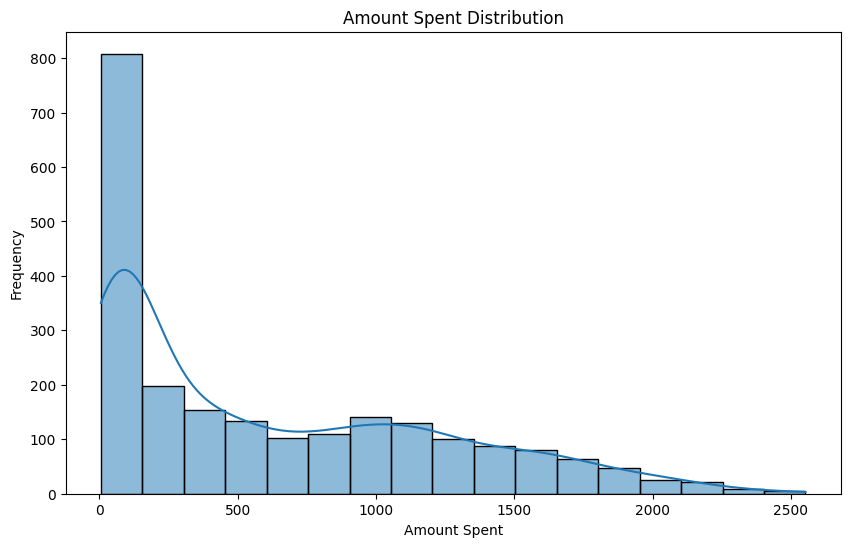

In [25]:
plt.figure(figsize=[10,6])
sns.histplot(data=data, x='Expenses', kde=True)
plt.title('Amount Spent Distribution')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.show()

In [26]:
data.NumWebVisitsMonth.describe()

,NumWebVisitsMonth
count,2216.000000
mean,5.319043
std,2.425359
min,0.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,20.000000


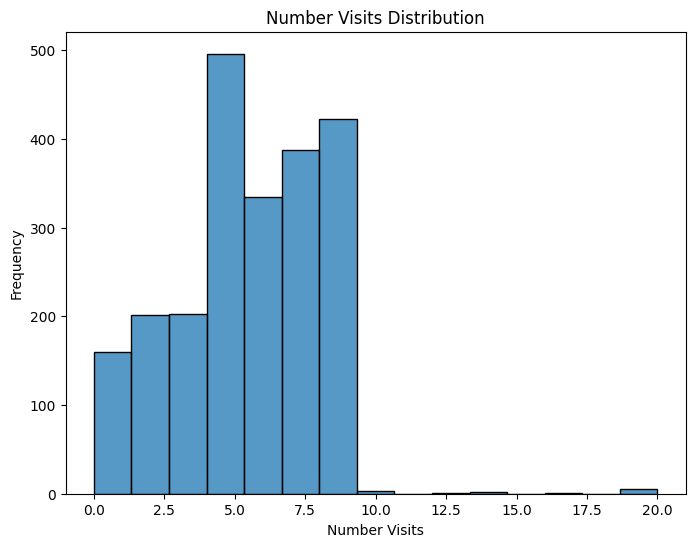

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(x=data['NumWebVisitsMonth'],bins=15)
plt.xlabel('Number Visits')
plt.title("Number Visits Distribution")
plt.ylabel('Frequency')
plt.show()

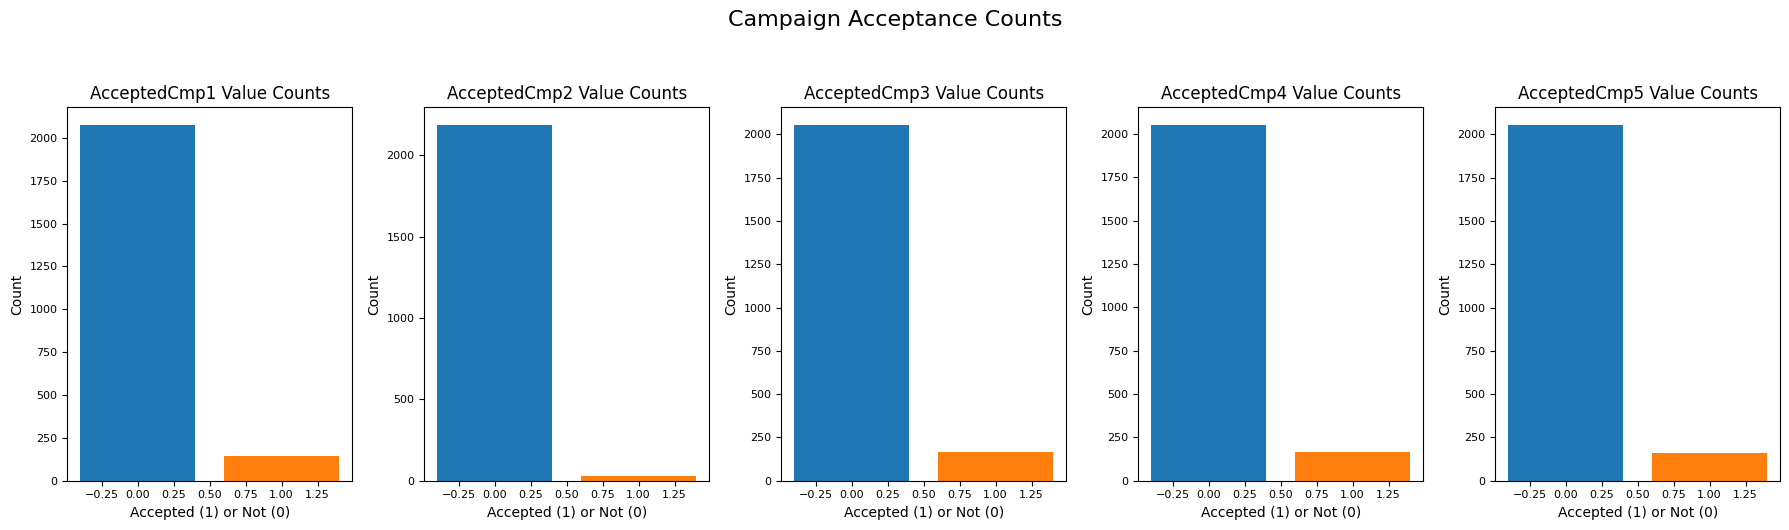

In [28]:
# Assuming df is your existing DataFrame
fig, axs = plt.subplots(1, 5, figsize=(18, 5))  # Adjust figsize as needed

# List of columns to plot
columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Loop through each column to plot value counts
for i, column in enumerate(columns):
    value_counts = data[column].value_counts()
    axs[i].bar(value_counts.index, value_counts.values, color=['#1f77b4', '#ff7f0e'])  # Custom colors
    axs[i].set_title(f'{column} Value Counts', fontsize=12)
    axs[i].set_xlabel('Accepted (1) or Not (0)', fontsize=10)
    axs[i].set_ylabel('Count', fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=8)  # Adjust tick size

# Add a common title for the whole figure
plt.suptitle('Campaign Acceptance Counts', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

In [29]:
complain = data.Complain.value_counts()
complain

,count
Complain,
0,2195
1,21


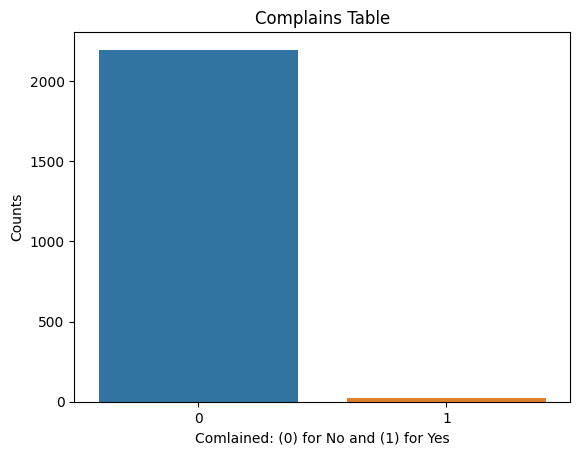

In [30]:
sns.barplot(x=complain.index, y=complain.values, hue=complain.index, legend=False)
plt.title('Complains Table')
plt.xlabel('Comlained: (0) for No and (1) for Yes')
plt.ylabel('Counts')
plt.show()

In [31]:
data.Z_CostContact.value_counts()

,count
Z_CostContact,
3,2216


In [32]:
data.Z_Revenue.value_counts()

,count
Z_Revenue,
11,2216


In [33]:
response = data.Response.value_counts()
response

,count
Response,
0,1883
1,333


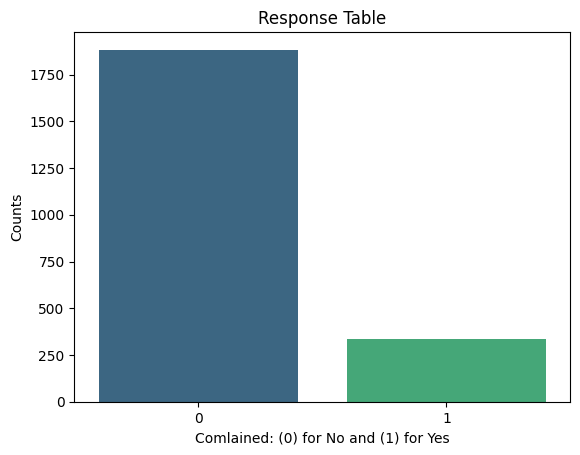

In [34]:
sns.barplot(x=response.index, y=response.values, hue=response.index, palette='viridis', legend=False)
plt.title('Response Table')
plt.xlabel('Comlained: (0) for No and (1) for Yes')
plt.ylabel('Counts')
plt.show()

In [35]:
data.drop(columns=['ID','Dt_Customer','Z_CostContact','Z_Revenue'],inplace=True)

In [36]:
encoder=LabelEncoder()
data['Education']=encoder.fit_transform(data['Education'])
data['Marital_Status']=encoder.fit_transform(data['Marital_Status'])

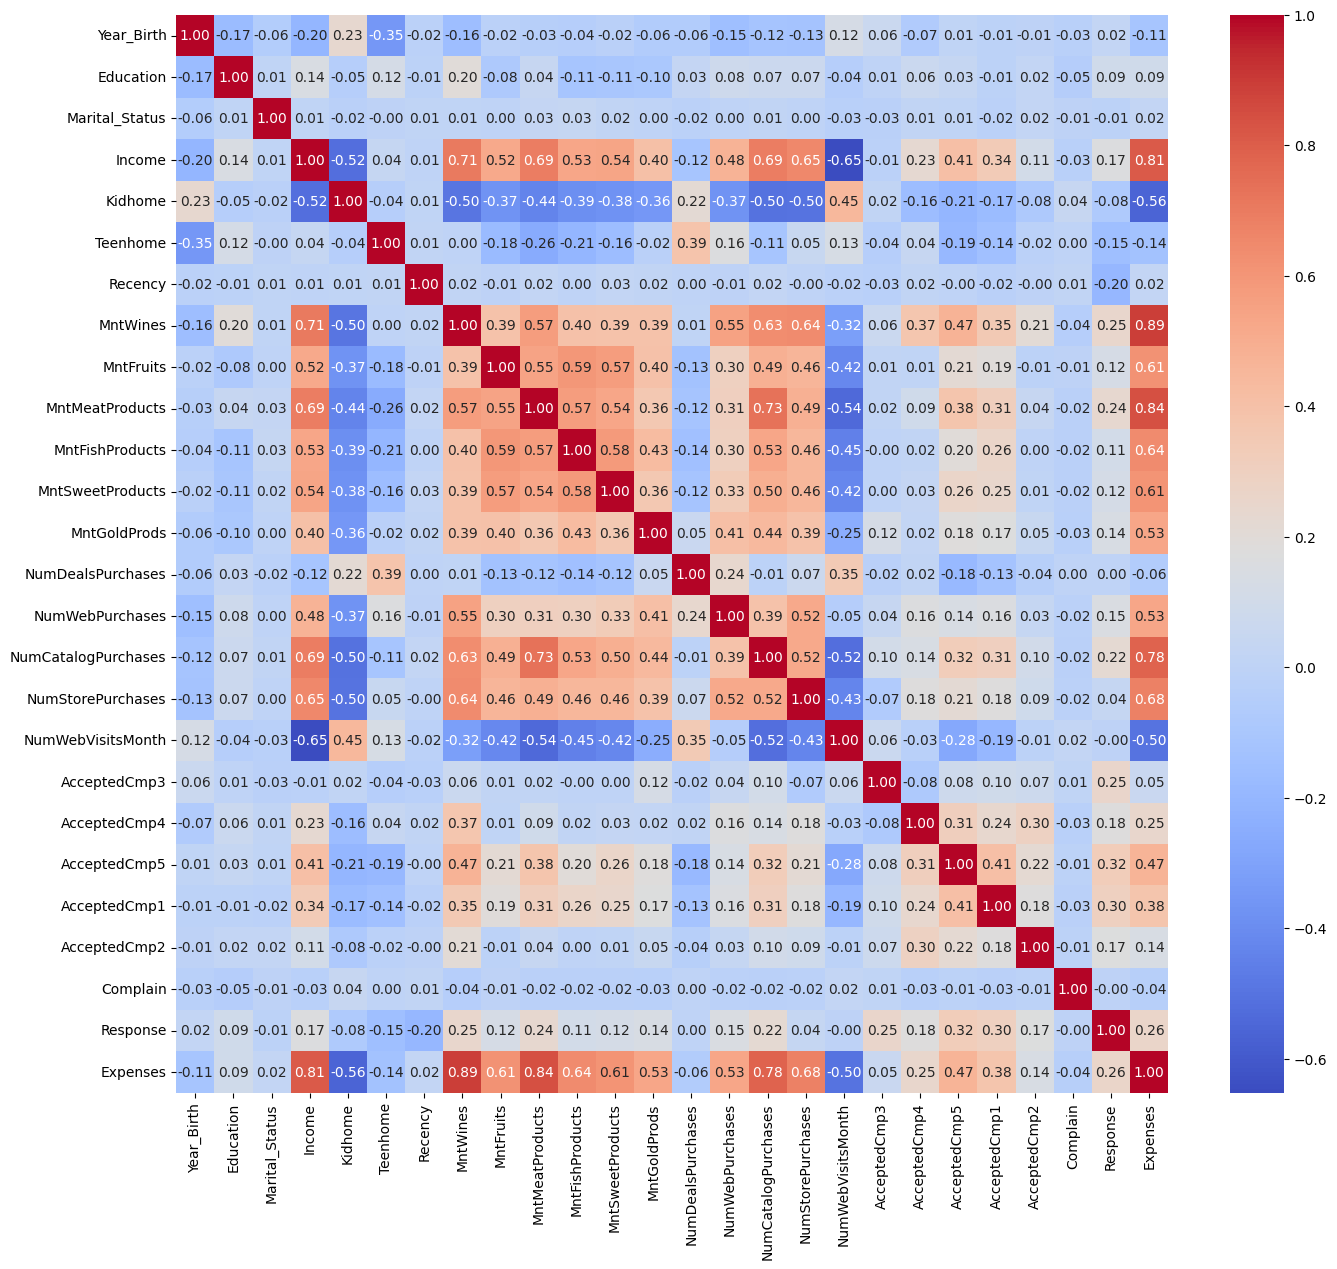

In [37]:
correlation_matrix = data.corr()
plt.figure(figsize=[16,14])
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [38]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=2)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)

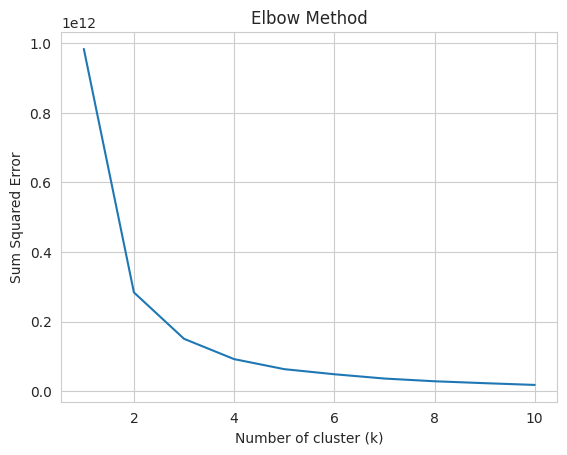

In [39]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [40]:
kmeans = KMeans(n_clusters = 3, random_state = 0, max_iter=300, init='k-means++')
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [51]:
kmeans_labels = kmeans.fit_predict(data)

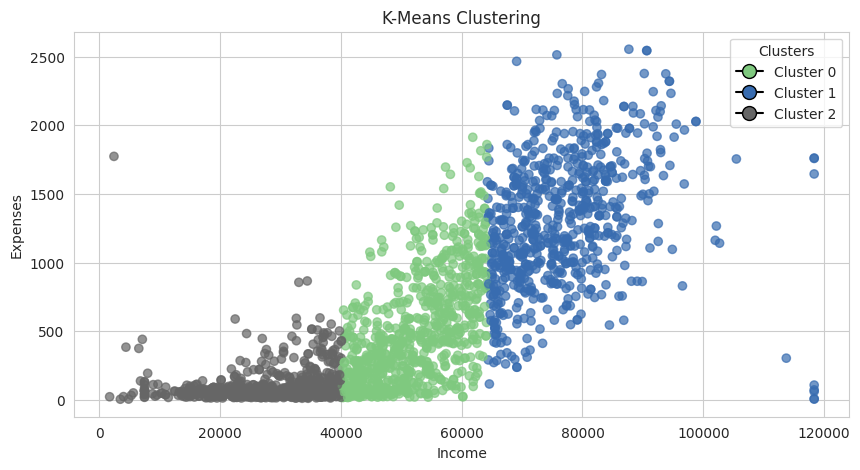

In [53]:
# Visualize K-Means clustering
plt.figure(figsize=(10, 5))

# Create a scatter plot
scatter = plt.scatter(data['Income'], data['Expenses'], c=kmeans_labels, cmap='Accent', alpha=0.7)

# Create custom legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='black', label=f'Cluster {i}',
                           markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
                   for i in range(3)]
plt.legend(handles=legend_elements, title='Clusters')

plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('Expenses')

plt.show()

In [47]:
agg_clust = AgglomerativeClustering(n_clusters=3)
cluster_labels = agg_clust.fit_predict(data)

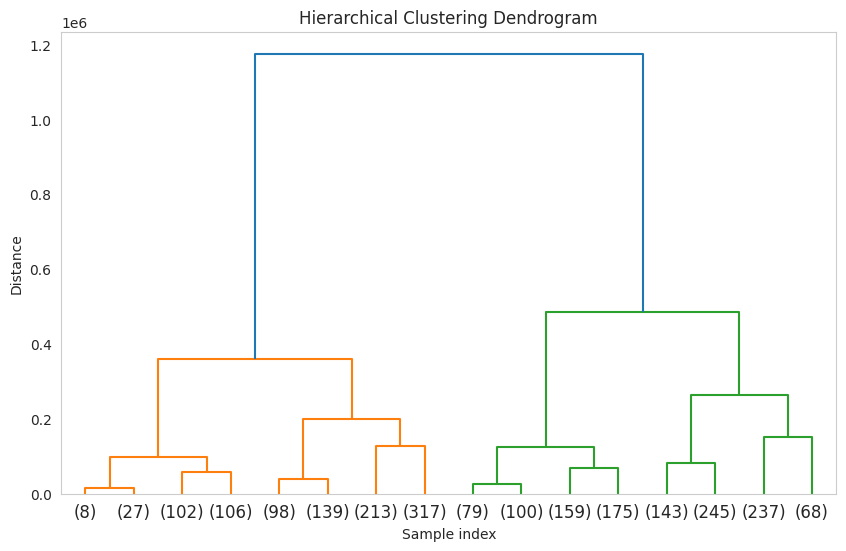

In [48]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
model.fit(data)
labels = model.labels_

linkage_matrix = linkage(data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

In [49]:
# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan_labels = dbscan.fit_predict(data)

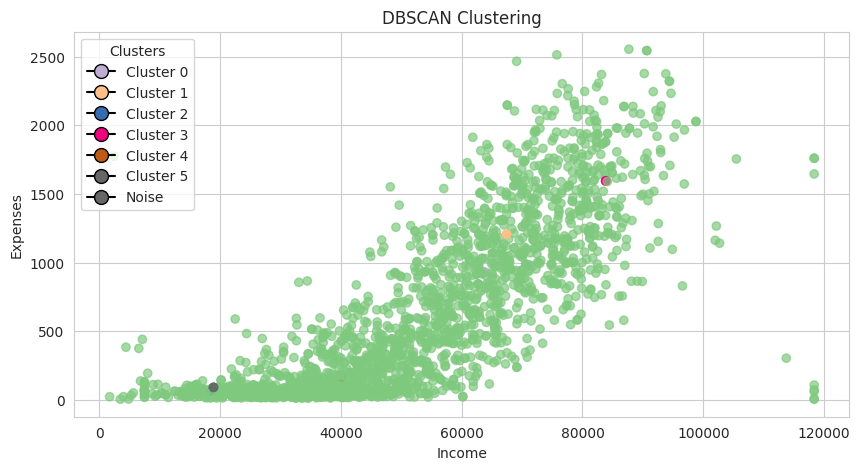

In [50]:
# Visualize DBSCAN clustering
plt.figure(figsize=(10, 5))

# Create a scatter plot
scatter = plt.scatter(data['Income'], data['Expenses'], c=dbscan_labels, cmap='Accent', alpha=0.7)

# Create a legend
unique_labels = set(dbscan_labels)
legend_labels = [f'Cluster {label}' if label != -1 else 'Noise' for label in unique_labels]

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='black', label=legend_labels[i],
                       markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10)
           for i in range(len(legend_labels))]
plt.legend(handles=handles, title="Clusters")

plt.title('DBSCAN Clustering')
plt.xlabel('Income')
plt.ylabel('Expenses')

plt.show()